In [234]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [235]:
def generate_trended_data(n_samples=1000, trend_slope=2, variance=0.1, random_seed=0):
    """
    Generate 2D data with a linear trend and specified variance.
    
    Parameters:
    - n_samples (int): Number of samples to generate.
    - trend_slope (float): Slope of the linear trend.
    - variance (float): Variance of the Gaussian random noise.
    
    Returns:
    - X (ndarray): Generated 2D data array with shape (n_samples, 2).
    """
    X = np.random.randn(n_samples, 2) * np.sqrt(variance)  
    X[:, 1] += trend_slope * X[:, 0]
    return X

# Generate 2D data with a linear trend and specified variance
X = generate_trended_data(n_samples=1000, trend_slope=3, variance=0.01)

### Principal Component Analysis (PCA) with scikit-learn

In [236]:
# Perform Singular Value Decomposition (with scikit-learn)
pca = PCA(n_components=2, svd_solver='auto', whiten=True)

# Fit PCA to the data
pca.fit(X)

# Get the principal components
sk_components = pca.components_

# Get the variance explained by each principal component
sk_variance_ratio = pca.explained_variance_ratio_

### Principal Component Analysis (PCA) using SVD

In [237]:
# Perform Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(np.transpose(X))

# Get the principal components
svd_components = U


# Get the variance explained by each principal component
svd_variance_ratio = S**2/np.sum(S**2)

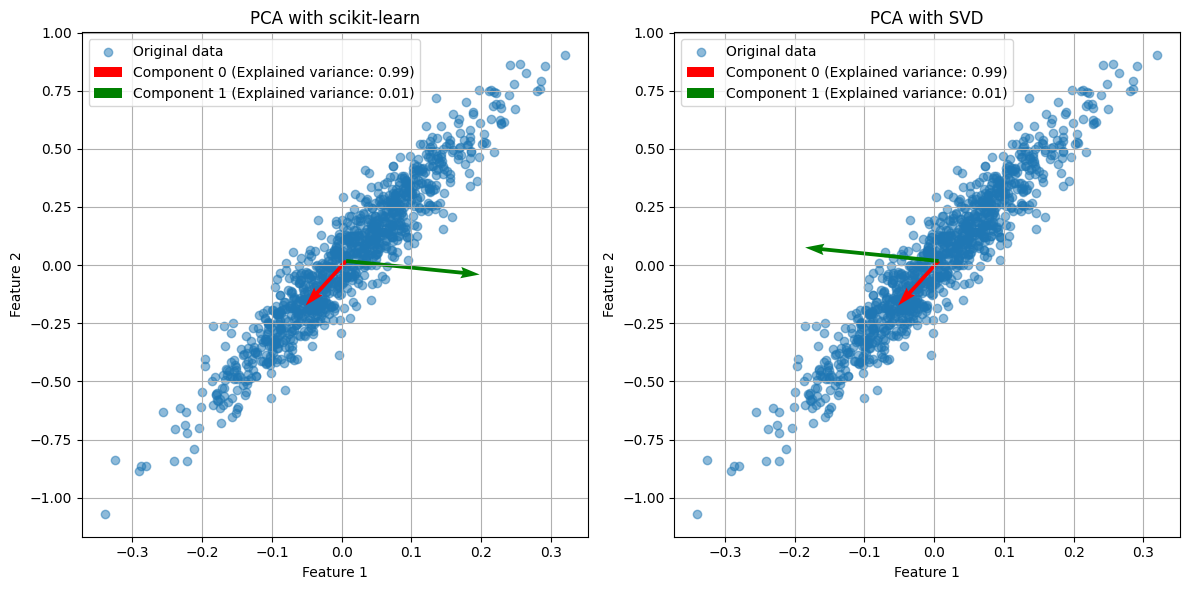

In [238]:
# Plot configuration
plt.figure(figsize=(12, 6))

# Plot the results using scikit-learn's PCA
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Original data')
color=['r', 'g']
for i in range(len(sk_components)):
    plt.quiver(np.mean(X[:, 0]), np.mean(X[:, 1]), sk_components[i,0], sk_components[i,1], scale=5, scale_units='xy', 
               angles='xy', color=color[i], label=f'Component {i} (Explained variance: {sk_variance_ratio[i]:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('PCA with scikit-learn')
plt.legend()
plt.grid(True)


# Plot the results using SVD
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Original data')
color=['r', 'g']
for i in range(len(svd_components)):
    plt.quiver(np.mean(X[:, 0]), np.mean(X[:, 1]), svd_components[i,0], svd_components[i,1], scale=5, scale_units='xy', 
               angles='xy', color=color[i], label=f'Component {i} (Explained variance: {svd_variance_ratio[i]:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('PCA with SVD')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()